# Logistic Regression- Framingham Model
## The Framingham Risk Score is a gender-specific algorithm used to estimate the 10-year cardiovascular risk of an individual. The Framingham Risk Score was first developed based on data obtained from the Framingham Heart Study, to estimate the 10-year risk of developing coronary heart disease.

## Importing the libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as plt

## Importing the dataset

In [2]:
ds=pd.read_csv("Framingham.csv")

In [3]:
ds

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4231,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4232,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4233,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Missing data: Using the SimpleImputer class and SNS plot

In [4]:
ds.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:xlabel='education', ylabel='Count'>

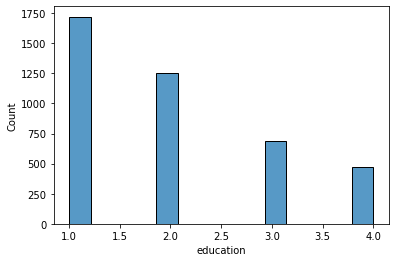

In [5]:
sns.histplot(ds['education'])

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

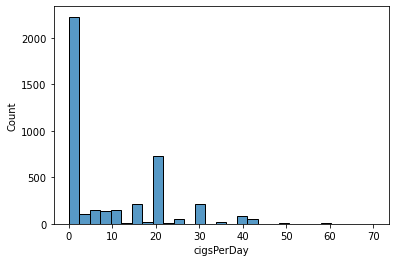

In [6]:
sns.histplot(ds['cigsPerDay'])

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

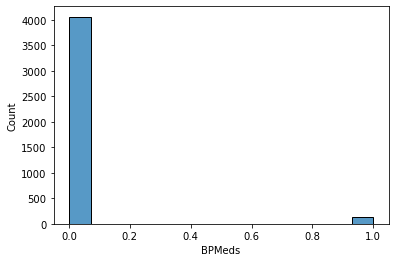

In [7]:
sns.histplot(ds['BPMeds'])

<AxesSubplot:xlabel='totChol', ylabel='Count'>

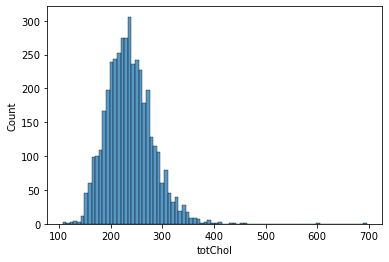

In [8]:
sns.histplot(ds['totChol'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

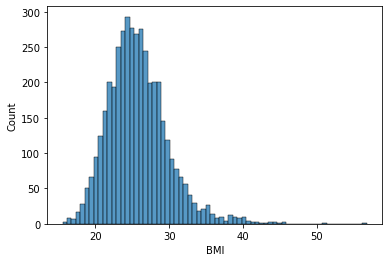

In [9]:
sns.histplot(ds['BMI'])

<AxesSubplot:xlabel='heartRate', ylabel='Count'>

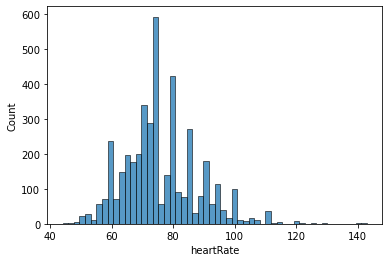

In [10]:
sns.histplot(ds['heartRate'])

<AxesSubplot:xlabel='glucose', ylabel='Count'>

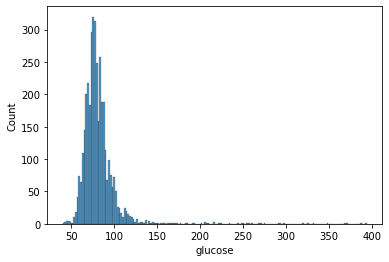

In [11]:
sns.histplot(ds['glucose'])

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='median')
ds['education']=imputer.fit_transform(ds[['education']])
ds['BPMeds']=imputer.fit_transform(ds[['BPMeds']])
ds['cigsPerDay']=imputer.fit_transform(ds[['cigsPerDay']])

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
ds['totChol']=imputer.fit_transform(ds[['totChol']])
ds['BMI']=imputer.fit_transform(ds[['BMI']])
ds['heartRate']=imputer.fit_transform(ds[['heartRate']])
ds['glucose']=imputer.fit_transform(ds[['glucose']])

## Handling Categorical Variables

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4235 non-null   int64  
 1   age              4235 non-null   int64  
 2   education        4235 non-null   float64
 3   currentSmoker    4235 non-null   int64  
 4   cigsPerDay       4235 non-null   float64
 5   BPMeds           4235 non-null   float64
 6   prevalentStroke  4235 non-null   int64  
 7   prevalentHyp     4235 non-null   int64  
 8   diabetes         4235 non-null   int64  
 9   totChol          4235 non-null   float64
 10  sysBP            4235 non-null   float64
 11  diaBP            4235 non-null   float64
 12  BMI              4235 non-null   float64
 13  heartRate        4235 non-null   float64
 14  glucose          4235 non-null   float64
 15  TenYearCHD       4235 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


## Splitting in X and y

In [15]:
ds.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [16]:
y=ds['TenYearCHD']
X=ds[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

### Select best 10 features to train your model
The `SelectKBest` method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

# Dataset display
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features from highest to lowest

              Specs       Score
10            sysBP  731.751473
14          glucose  389.791591
1               age  319.383383
9           totChol  230.183847
4        cigsPerDay  228.670446
11            diaBP  153.482942
7      prevalentHyp   92.481520
8          diabetes   39.177652
5            BPMeds   30.788601
0              male   19.158708
6   prevalentStroke   16.121190


## Splitting the data into X and y with selected independent variables

In [18]:
X=ds[['sysBP','glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','prevalentStroke']]

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## Predicting a new result-Validation set
* Only select the variables you used for training

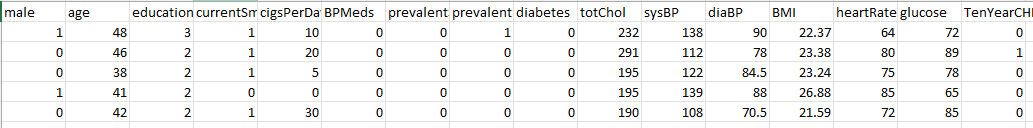

In [22]:
X

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,prevalentStroke
0,106.0,77.000000,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.000000,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.000000,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.000000,61,225.0,30.0,95.0,1,0,0.0,0,0
4,130.0,85.000000,46,285.0,23.0,84.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4230,131.0,86.000000,48,248.0,20.0,72.0,0,0,0.0,0,0
4231,126.5,81.969067,44,210.0,15.0,87.0,0,0,0.0,0,0
4232,133.5,107.000000,52,269.0,0.0,83.0,0,0,0.0,0,0
4233,141.0,72.000000,40,185.0,0.0,98.0,1,0,0.0,1,0


In [23]:
print(classifier.predict(sc.transform([[138,72,48,232,10,90,1,0,0,1,0]])))

[0]


In [24]:
print(classifier.predict(sc.transform([[112,89,46,291,20,78,0,0,0,0,0]])))

[0]


## Predicting the Test set results

In [25]:
y_pred=classifier.predict(X_test)

## Confusion Matrix

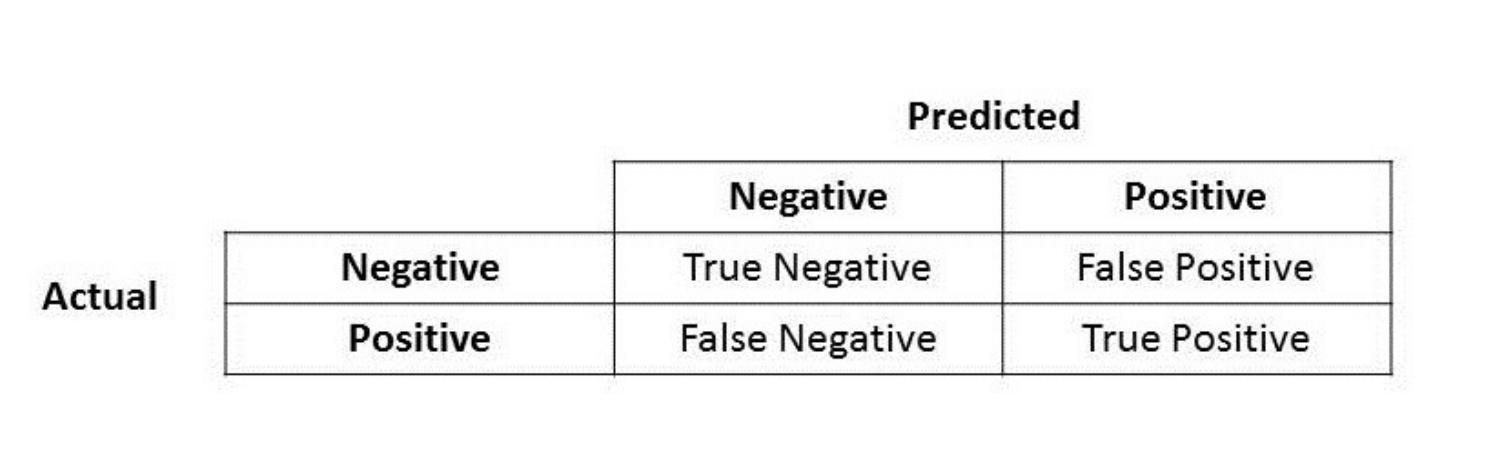

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [27]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[695   8]
 [130  14]]


In [28]:
accuracy_score(y_test,y_pred)

0.8370720188902007

## Comment on yout findings

The model is 83% although the data is not skewed the results can vary with a 20% chance of being incorrect.

# TN = No Heart Disease predictced correctly (695)
# TP = Heart Disease predicted correctly (14)
# FP = Actually No HD but predicted HD (130)
# FN = Actually HD but prediced no HD (8)

The model was excellent at predicting that a lot of people would have heart disease in the next 10 years. Perhaps this data changed their future, because it was incorrect 130 times and right only 14 times.